# Library

In [ ]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
!pip install -U imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bigdata & mining/FP/heart.csv')

In [ ]:
df.head(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


# Menampilkan keterangan dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Menghitung missing value

In [ ]:
print(df.isnull().sum())

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


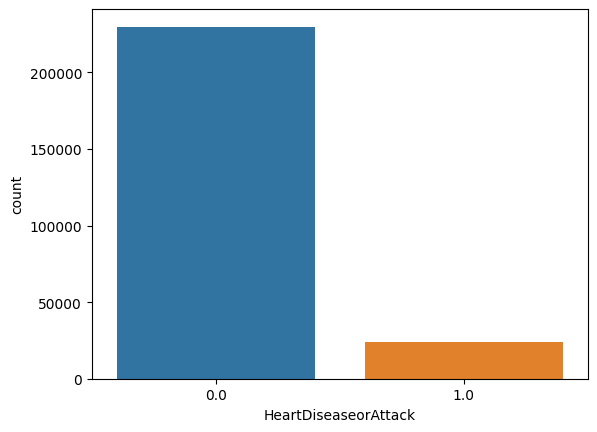

In [ ]:
sns.countplot(x='HeartDiseaseorAttack', data=df)
plt.show()

In [ ]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

undersample_size = sum(y == 1)
undersample = RandomUnderSampler(sampling_strategy={0: undersample_size}, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)
data_tergabung_ha = pd.DataFrame(data=X_resampled, columns=X.columns)
data_tergabung_ha['HeartDiseaseorAttack'] = y_resampled

In [ ]:
data_tergabung_ha

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack
213839,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0
159661,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,5.0,2.0,0.0,0.0,6.0,6.0,8.0,0.0
52295,0.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,3.0,4.0,7.0,0.0
79475,0.0,1.0,1.0,75.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,3.0,30.0,1.0,1.0,13.0,6.0,2.0,0.0
103276,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253668,0.0,1.0,1.0,29.0,1.0,0.0,2.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0,1.0
253670,1.0,1.0,1.0,25.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0,1.0
253671,1.0,1.0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0,1.0
253672,1.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0,1.0,1.0


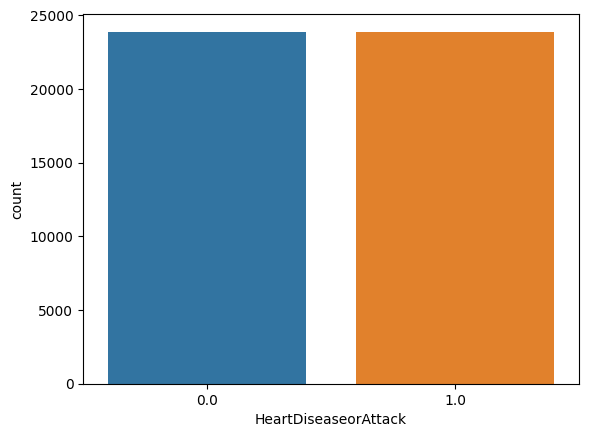

In [ ]:
sns.countplot(x='HeartDiseaseorAttack', data=data_tergabung_ha)
plt.show()

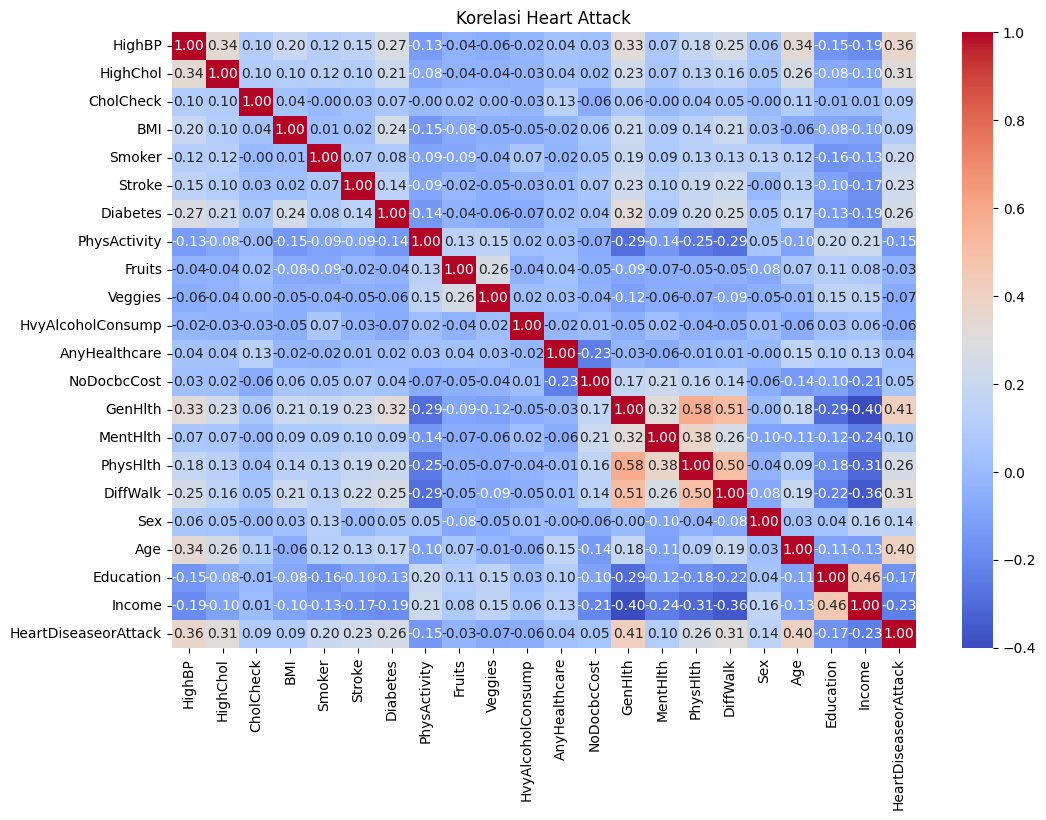

In [ ]:
correlation_matrix = data_tergabung_ha.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Heart Attack')
plt.show()

In [ ]:
data_tergabung_ha.HeartDiseaseorAttack.value_counts()

0.0    23893
1.0    23893
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
uselesscoloum = ['Income', 'Education','HvyAlcoholConsump','PhysActivity','Fruits','Veggies']
for kolom in uselesscoloum:
    del data_tergabung_ha[kolom]


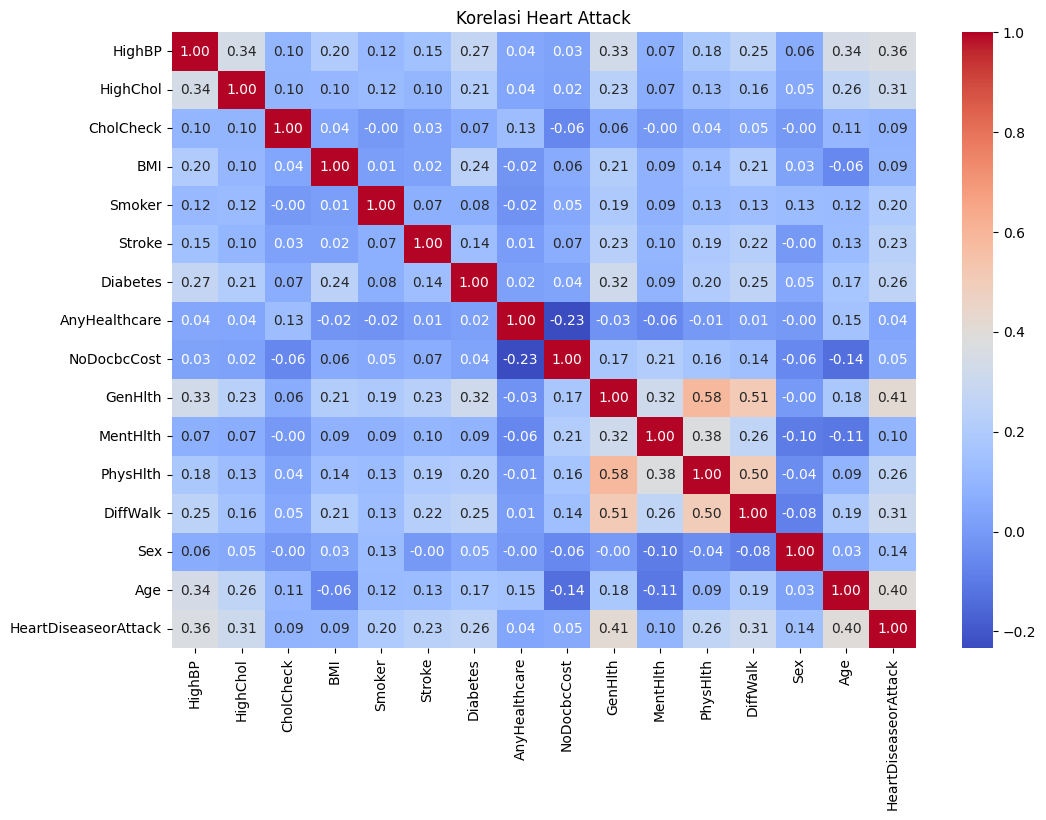

In [ ]:
correlation_matrix = data_tergabung_ha.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Heart Attack')
plt.show()

In [ ]:
cor = data_tergabung_ha.corr()

#Correlation with output variable
cor_target = abs(cor['HeartDiseaseorAttack'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

HighBP                  0.364239
HighChol                0.308358
Smoker                  0.198257
Stroke                  0.232944
Diabetes                0.255236
GenHlth                 0.412242
PhysHlth                0.259382
DiffWalk                0.305820
Sex                     0.143222
Age                     0.397378
HeartDiseaseorAttack    1.000000
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
relevant_features_col = ['Age','Sex','DiffWalk','PhysHlth','GenHlth','Diabetes','Stroke','Smoker','HighChol','HighBP']

In [ ]:
selected_df = data_tergabung_ha[relevant_features_col]

In [ ]:
selected_df.head(10)

,Age,Sex,DiffWalk,PhysHlth,GenHlth,Diabetes,Stroke,Smoker,HighChol,HighBP
213839,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
159661,6.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0
52295,3.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
79475,13.0,1.0,1.0,30.0,5.0,0.0,0.0,1.0,1.0,0.0
103276,7.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
136286,8.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
146373,10.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,1.0
31350,10.0,0.0,0.0,5.0,2.0,2.0,0.0,0.0,1.0,1.0
11409,10.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
128364,7.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0


# Split Data

In [ ]:
X = selected_df
y = data_tergabung_ha['HeartDiseaseorAttack']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
prediction = model.predict(selected_df.loc[253668].values.reshape(1, -1))
print('\nPrediction : ', prediction)


Prediction :  [1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Matriks Konfusi:')
print(conf_matrix)

Matriks Konfusi:
[[3565 1175]
 [1044 3774]]


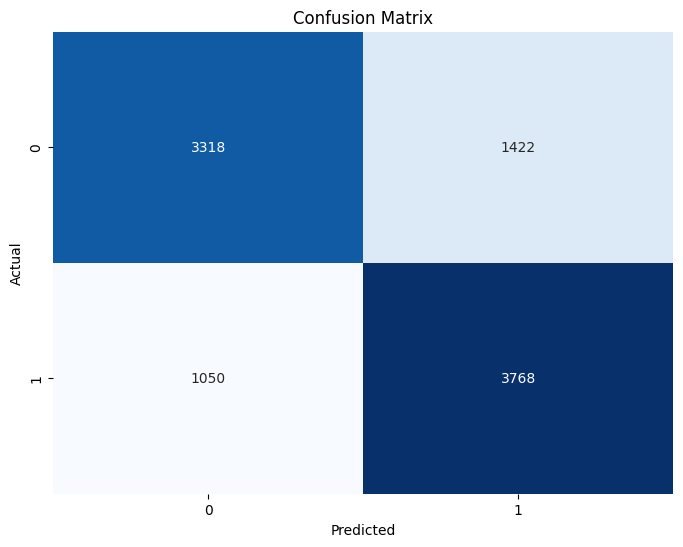

In [ ]:
# Assuming you already have conf_matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Accuracy: 0.7678384599288554
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      4740
         1.0       0.76      0.78      0.77      4818

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.77      9558
weighted avg       0.77      0.77      0.77      9558

ROC AUC Score: 0.8425019222921079


In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [100,1000,1500],
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Lakukan pencarian hyperparameter terbaik menggunakan data latih
grid_search.fit(X_train, y_train)

# Tampilkan hyperparameter terbaik
print("Hyperparameter Terbaik:", grid_search.best_params_)

# Evaluasi model pada data uji
accuracy = grid_search.score(X_test, y_test)
print(f'Akurasi Model pada Data Uji: {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Hyperparameter Terbaik: {'C': 1000, 'penalty': 'l2'}
Akurasi Model pada Data Uji: 0.7680477087256748


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definisikan distribusi hyperparameter
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': randint(100, 1501),  # Distribusi kontinu antara 100 dan 1500
}

# Inisialisasi RandomizedSearchCV dengan n_iter
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5, scoring='accuracy', n_iter=5)

# Lakukan pencarian hyperparameter terbaik menggunakan data latih
random_search.fit(X_train, y_train)

# Tampilkan hyperparameter terbaik
print("Hyperparameter Terbaik:", random_search.best_params_)

# Evaluasi model pada data uji
accuracy = random_search.score(X_test, y_test)
print(f'Akurasi Model pada Data Uji: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceba

Hyperparameter Terbaik: {'C': 1085, 'penalty': 'l2'}
Akurasi Model pada Data Uji: 0.7678384599288554
